In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 

In [5]:
priority=pd.read_csv(r"C:\Users\goura\OneDrive\Desktop\Coding Problems - Copy\my_project\Test_Project_MIS (1).csv")

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='weighted')  # Change the average parameter here
    recall = recall_score(y_true, y_preds, average='weighted')  # Change the average parameter here
    f1 = f1_score(y_true, y_preds, average='weighted')  # Change the average parameter here
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [7]:
priority

,B_Req,R_Priority,Weights,FP,Complexity,Time,Cost,Priority
0,1,C,3,"T-mis-2708,T-mis- 2151,T-mis- 560,T-mis- 164,T...",3,8,168.0,Medium
1,2,C,3,T-mis-1755,3,4,84.0,High
2,3,W,3,T-mis-3227,3,1.5,31.5,Medium
3,4,S,2,"T-mis-2440,T-mis- 2659,T-mis- 1510",1,4,28.0,Medium
4,5,C,3,"T-mis-2912,T-mis- 2042,T-mis- 1020",5,4,140.0,Medium
...,...,...,...,...,...,...,...,...
1309,1310,S,2,"T-mis-261,T-mis- 934",1,3,21.0,Low
1310,1311,S,2,"T-mis-299,T-mis- 290,T-mis- 2090",3,4,84.0,Low
1311,1312,C,3,"T-mis-1289,T-mis- 652,T-mis- 1061",3,4,84.0,Low
1312,1313,M,1,"T-mis-1003,T-mis- 1407,T-mis- 922",1,5,35.0,Low


In [8]:
priority.head()

,B_Req,R_Priority,Weights,FP,Complexity,Time,Cost,Priority
0,1,C,3,"T-mis-2708,T-mis- 2151,T-mis- 560,T-mis- 164,T...",3,8,168.0,Medium
1,2,C,3,T-mis-1755,3,4,84.0,High
2,3,W,3,T-mis-3227,3,1.5,31.5,Medium
3,4,S,2,"T-mis-2440,T-mis- 2659,T-mis- 1510",1,4,28.0,Medium
4,5,C,3,"T-mis-2912,T-mis- 2042,T-mis- 1020",5,4,140.0,Medium


In [9]:
priority.corr(numeric_only=True)

,B_Req,Weights,Complexity,Cost
B_Req,1.000000,-0.014212,-0.051933,-0.083774
Weights,-0.014212,1.000000,0.009000,-0.010310
Complexity,-0.051933,0.009000,1.000000,0.727958
Cost,-0.083774,-0.010310,0.727958,1.000000


In [10]:
priority['Priority'].describe()

count       1314
unique         3
top       Medium
freq         655
Name: Priority, dtype: object

In [11]:
# Define a mapping dictionary
priority_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mapping to the 'Priority' column
priority['Priority'] = priority['Priority'].map(priority_mapping)

# Display the updated DataFrame
print(priority)


      B_Req R_Priority  Weights  \
0         1          C        3   
1         2          C        3   
2         3          W        3   
3         4          S        2   
4         5          C        3   
...     ...        ...      ...   
1309   1310          S        2   
1310   1311          S        2   
1311   1312          C        3   
1312   1313          M        1   
1313   1314          W        3   

                                                     FP  Complexity Time  \
0     T-mis-2708,T-mis- 2151,T-mis- 560,T-mis- 164,T...           3    8   
1                                            T-mis-1755           3    4   
2                                            T-mis-3227           3  1.5   
3                    T-mis-2440,T-mis- 2659,T-mis- 1510           1    4   
4                    T-mis-2912,T-mis- 2042,T-mis- 1020           5    4   
...                                                 ...         ...  ...   
1309                               T-mis-261,T-

In [12]:
priority.head()

,B_Req,R_Priority,Weights,FP,Complexity,Time,Cost,Priority
0,1,C,3,"T-mis-2708,T-mis- 2151,T-mis- 560,T-mis- 164,T...",3,8,168.0,2
1,2,C,3,T-mis-1755,3,4,84.0,3
2,3,W,3,T-mis-3227,3,1.5,31.5,2
3,4,S,2,"T-mis-2440,T-mis- 2659,T-mis- 1510",1,4,28.0,2
4,5,C,3,"T-mis-2912,T-mis- 2042,T-mis- 1020",5,4,140.0,2


In [13]:
priority['Priority'].describe()

count    1314.000000
mean        1.703957
std         0.643581
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: Priority, dtype: float64

In [14]:
corr_factor=priority.corr(numeric_only=True)

In [15]:
corr_factor

,B_Req,Weights,Complexity,Cost,Priority
B_Req,1.000000,-0.014212,-0.051933,-0.083774,-0.601583
Weights,-0.014212,1.000000,0.009000,-0.010310,0.008083
Complexity,-0.051933,0.009000,1.000000,0.727958,0.055137
Cost,-0.083774,-0.010310,0.727958,1.000000,0.076122
Priority,-0.601583,0.008083,0.055137,0.076122,1.000000


In [16]:
corr_factor['Priority']

B_Req        -0.601583
Weights       0.008083
Complexity    0.055137
Cost          0.076122
Priority      1.000000
Name: Priority, dtype: float64

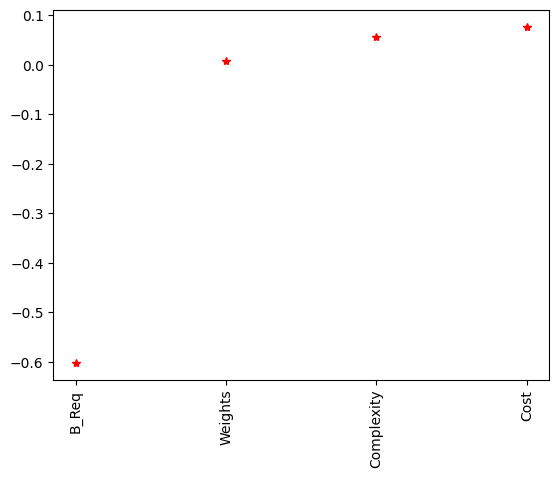

In [17]:
plt.plot(corr_factor['Priority'].drop('Priority'),'r*')
plt.tick_params(axis='x',rotation=90)

<Axes: >

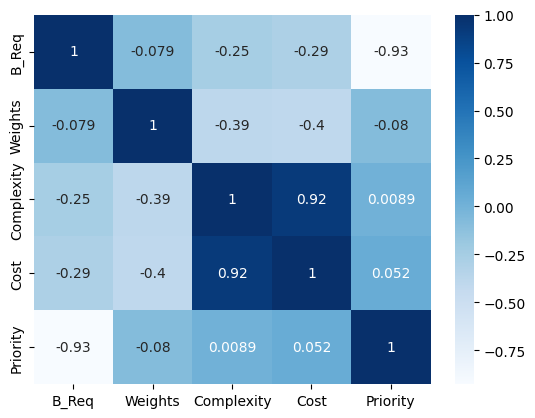

In [18]:
sns.heatmap(corr_factor.corr(numeric_only=True),cmap='Blues',annot=True)

In [19]:
x=priority[['B_Req','Weights', 'Complexity', 'Cost','Priority']]
x.head()

,B_Req,Weights,Complexity,Cost,Priority
0,1,3,3,168.0,2
1,2,3,3,84.0,3
2,3,3,3,31.5,2
3,4,2,1,28.0,2
4,5,3,5,140.0,2


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
np.random.seed(42)

 

X= x.drop(["Priority"],axis=1)
y=x["Priority"]

 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)



model=RandomForestClassifier()
model.fit(X_train,y_train)
 

model.score(X_test,y_test)


0.7300380228136882

In [21]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
y_preds = model.predict(X_test)
y_preds
 

array([1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2, 1, 1, 1, 2, 3, 2, 1, 1,
       2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 2, 1, 2,
       2, 2, 1, 1, 3, 1, 1, 2, 2, 3, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 3, 2, 1, 1, 3,
       2, 1, 1, 2, 1, 1, 2, 1, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 3, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 3, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2],
      dtype=int64)

In [23]:
metrics=evaluate_preds(y_test,y_preds)

Acc: 73.00%
Precision: 0.71
Recall: 0.73
F1 score: 0.72


In [24]:
priority.head()

,B_Req,R_Priority,Weights,FP,Complexity,Time,Cost,Priority
0,1,C,3,"T-mis-2708,T-mis- 2151,T-mis- 560,T-mis- 164,T...",3,8,168.0,2
1,2,C,3,T-mis-1755,3,4,84.0,3
2,3,W,3,T-mis-3227,3,1.5,31.5,2
3,4,S,2,"T-mis-2440,T-mis- 2659,T-mis- 1510",1,4,28.0,2
4,5,C,3,"T-mis-2912,T-mis- 2042,T-mis- 1020",5,4,140.0,2


In [25]:
categorical_variables = ["R_Priority", "FP"]
dummies = pd.get_dummies(data=priority[categorical_variables])
dummies

,R_Priority_C,R_Priority_M,R_Priority_S,R_Priority_W,"FP_T-mis-1,T-mis- 882","FP_T-mis-1003,T-mis- 1407,T-mis- 922",FP_T-mis-1009,"FP_T-mis-101,T-mis- 2931,T-mis- 3234,T-mis- 1948","FP_T-mis-1011,T-mis- 2227","FP_T-mis-1011,T-mis- 2995,T-mis- 2785",...,"FP_T-mis-977,T-mis- 271",FP_T-mis-979,"FP_T-mis-983,T-mis- 1913,T-mis- 1995,T-mis- 2385","FP_T-mis-983,T-mis- 755,T-mis- 532,T-mis- 1674","FP_T-mis-985,T-mis- 1908,T-mis- 2136","FP_T-mis-986,T-mis- 2273,T-mis- 792","FP_T-mis-991,T-mis- 1904,T-mis- 1544",FP_T-mis-997,"FP_T-mis-997,T-mis- 3163","FP_T-mis-997,T-mis- 3227,T-mis- 1293"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1310,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1311,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1312,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
model.predict([[2,4,3,84]])

c:\python 3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

In [28]:
dummies.corr(numeric_only=True)

,R_Priority_C,R_Priority_M,R_Priority_S,R_Priority_W,"FP_T-mis-1,T-mis- 882","FP_T-mis-1003,T-mis- 1407,T-mis- 922",FP_T-mis-1009,"FP_T-mis-101,T-mis- 2931,T-mis- 3234,T-mis- 1948","FP_T-mis-1011,T-mis- 2227","FP_T-mis-1011,T-mis- 2995,T-mis- 2785",...,"FP_T-mis-977,T-mis- 271",FP_T-mis-979,"FP_T-mis-983,T-mis- 1913,T-mis- 1995,T-mis- 2385","FP_T-mis-983,T-mis- 755,T-mis- 532,T-mis- 1674","FP_T-mis-985,T-mis- 1908,T-mis- 2136","FP_T-mis-986,T-mis- 2273,T-mis- 792","FP_T-mis-991,T-mis- 1904,T-mis- 1544",FP_T-mis-997,"FP_T-mis-997,T-mis- 3163","FP_T-mis-997,T-mis- 3227,T-mis- 1293"
R_Priority_C,1.000000,-0.310688,-0.304893,-0.199271,-0.012002,-0.012002,-0.012002,-0.012002,0.063456,-0.012002,...,-0.012002,-0.012002,0.063456,-0.012002,-0.012002,-0.012002,-0.012002,-0.016980,-0.012002,0.063456
R_Priority_M,-0.310688,1.000000,-0.500827,-0.327329,-0.019715,0.038631,-0.019715,-0.019715,-0.019715,-0.019715,...,-0.019715,-0.019715,-0.019715,-0.019715,-0.019715,-0.019715,0.038631,-0.027892,0.038631,-0.019715
R_Priority_S,-0.304893,-0.500827,1.000000,-0.321224,0.039365,-0.019347,-0.019347,-0.019347,-0.019347,0.039365,...,0.039365,0.039365,-0.019347,0.039365,0.039365,0.039365,-0.019347,0.055692,-0.019347,-0.019347
R_Priority_W,-0.199271,-0.327329,-0.321224,1.000000,-0.012645,-0.012645,0.060230,0.060230,-0.012645,-0.012645,...,-0.012645,-0.012645,-0.012645,-0.012645,-0.012645,-0.012645,-0.012645,-0.017890,-0.012645,-0.012645
"FP_T-mis-1,T-mis- 882",-0.012002,-0.019715,0.039365,-0.012645,1.000000,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,...,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,-0.001077,-0.000762,-0.000762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"FP_T-mis-986,T-mis- 2273,T-mis- 792",-0.012002,-0.019715,0.039365,-0.012645,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,...,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,1.000000,-0.000762,-0.001077,-0.000762,-0.000762
"FP_T-mis-991,T-mis- 1904,T-mis- 1544",-0.012002,0.038631,-0.019347,-0.012645,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,...,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,1.000000,-0.001077,-0.000762,-0.000762
FP_T-mis-997,-0.016980,-0.027892,0.055692,-0.017890,-0.001077,-0.001077,-0.001077,-0.001077,-0.001077,-0.001077,...,-0.001077,-0.001077,-0.001077,-0.001077,-0.001077,-0.001077,-0.001077,1.000000,-0.001077,-0.001077
"FP_T-mis-997,T-mis- 3163",-0.012002,0.038631,-0.019347,-0.012645,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,...,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,-0.000762,-0.001077,1.000000,-0.000762


In [29]:
new_data=priority = pd.concat([priority, dummies], axis='columns')

# Display the first few rows of the updated DataFrame
priority.head()

,B_Req,R_Priority,Weights,FP,Complexity,Time,Cost,Priority,R_Priority_C,R_Priority_M,...,"FP_T-mis-977,T-mis- 271",FP_T-mis-979,"FP_T-mis-983,T-mis- 1913,T-mis- 1995,T-mis- 2385","FP_T-mis-983,T-mis- 755,T-mis- 532,T-mis- 1674","FP_T-mis-985,T-mis- 1908,T-mis- 2136","FP_T-mis-986,T-mis- 2273,T-mis- 792","FP_T-mis-991,T-mis- 1904,T-mis- 1544",FP_T-mis-997,"FP_T-mis-997,T-mis- 3163","FP_T-mis-997,T-mis- 3227,T-mis- 1293"
0,1,C,3,"T-mis-2708,T-mis- 2151,T-mis- 560,T-mis- 164,T...",3,8,168.0,2,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,C,3,T-mis-1755,3,4,84.0,3,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,W,3,T-mis-3227,3,1.5,31.5,2,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,S,2,"T-mis-2440,T-mis- 2659,T-mis- 1510",1,4,28.0,2,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,C,3,"T-mis-2912,T-mis- 2042,T-mis- 1020",5,4,140.0,2,True,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
data_frame=new_data.drop(['FP','R_Priority'],axis=1)
data_frame.head()

,B_Req,Weights,Complexity,Time,Cost,Priority,R_Priority_C,R_Priority_M,R_Priority_S,R_Priority_W,...,"FP_T-mis-977,T-mis- 271",FP_T-mis-979,"FP_T-mis-983,T-mis- 1913,T-mis- 1995,T-mis- 2385","FP_T-mis-983,T-mis- 755,T-mis- 532,T-mis- 1674","FP_T-mis-985,T-mis- 1908,T-mis- 2136","FP_T-mis-986,T-mis- 2273,T-mis- 792","FP_T-mis-991,T-mis- 1904,T-mis- 1544",FP_T-mis-997,"FP_T-mis-997,T-mis- 3163","FP_T-mis-997,T-mis- 3227,T-mis- 1293"
0,1,3,3,8,168.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,3,3,4,84.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3,3,1.5,31.5,2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,2,1,4,28.0,2,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3,5,4,140.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
corr=data_frame.corr(numeric_only=True)

In [32]:
corr['Priority']

B_Req                                  -0.601583
Weights                                 0.008083
Complexity                              0.055137
Cost                                    0.076122
Priority                                1.000000
                                          ...   
FP_T-mis-986,T-mis- 2273,T-mis- 792    -0.030198
FP_T-mis-991,T-mis- 1904,T-mis- 1544    0.012699
FP_T-mis-997                           -0.012378
FP_T-mis-997,T-mis- 3163                0.012699
FP_T-mis-997,T-mis- 3227,T-mis- 1293    0.012699
Name: Priority, Length: 1315, dtype: float64

In [33]:
x

,B_Req,Weights,Complexity,Cost,Priority
0,1,3,3,168.0,2
1,2,3,3,84.0,3
2,3,3,3,31.5,2
3,4,2,1,28.0,2
4,5,3,5,140.0,2
...,...,...,...,...,...
1309,1310,2,1,21.0,1
1310,1311,2,3,84.0,1
1311,1312,3,3,84.0,1
1312,1313,1,1,35.0,1


In [34]:
param_distributions = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                       "max_depth": [None, 5, 10, 20, 30],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4, 6, 8],
                       "min_samples_leaf": [1, 2, 4, 8]}

In [35]:
import time
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = x.drop("Priority", axis=1)
y = x["Priority"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available cores on your machine (if this causes errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV 
n_iter = 30 # try 30 models total
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            n_iter=n_iter, 
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
rs_clf.fit(X_train, y_train);

# Finish the timer
end_time = time.time()
print(f"[INFO] Total time taken for {n_iter} random combinations of hyperparameters: {end_time - start_time:.2f} seconds.")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estima

In [36]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 30}

In [37]:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 82.89%
Precision: 0.76
Recall: 0.83
F1 score: 0.79


c:\python 3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
rs_y_preds

array([1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2],
      dtype=int64)

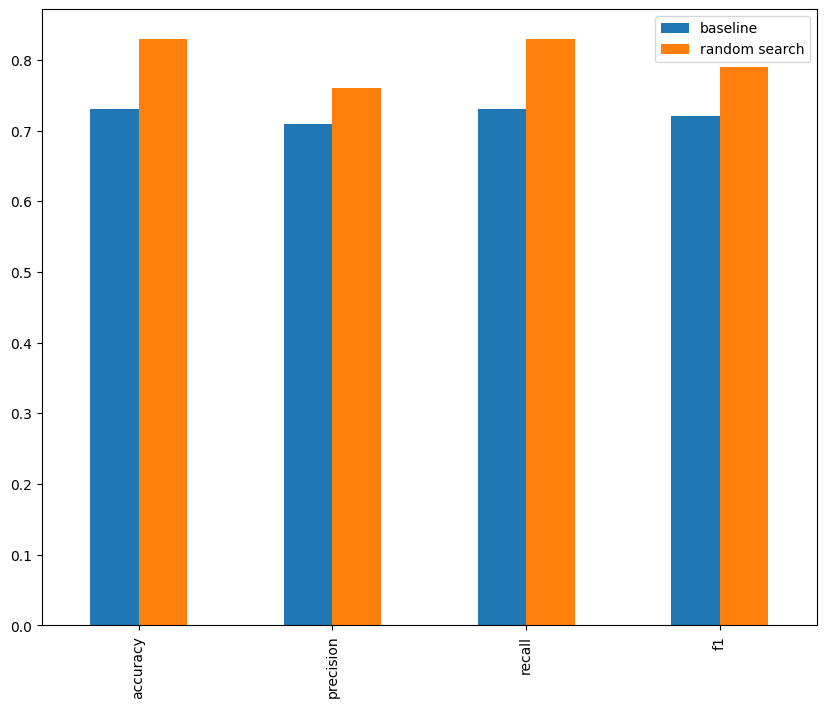

In [39]:
compare_metrics = pd.DataFrame({"baseline": metrics,
                                "random search": rs_metrics,})
compare_metrics.plot.bar(figsize=(10, 8));

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
np.random.seed(42)

 

X= x.drop(["Priority"],axis=1)
y=x["Priority"]

 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30)

hyperparameters = {
    'n_estimators': 1000,
    'min_samples_split': 6,
    'min_samples_leaf': 8,
    'max_features': 'log2',
    'max_depth': 30
}

model2=RandomForestClassifier(**hyperparameters)
model2.fit(X_train,y_train)
 

model2.score(X_test,y_test)


0.8202531645569621

In [41]:
y_predict= model2.predict(X_test)
r_metrics = evaluate_preds(y_test, y_predict)

Acc: 82.03%
Precision: 0.75
Recall: 0.82
F1 score: 0.78


c:\python 3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
import pickle
best_model_file_name_pickle = "Task_Priority.pkl" # .pkl extension stands for "pickle"
pickle.dump(model, open(best_model_file_name_pickle, "wb"))